<a href="https://colab.research.google.com/github/SaifElMadani/DataScience_projects/blob/main/Iris_Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
#Import dependecies
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [220]:
#Import the data 
df = px.data.iris()

In [221]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [222]:
#Clean the data
df = df.drop(columns=['species_id'])

In [201]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [223]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

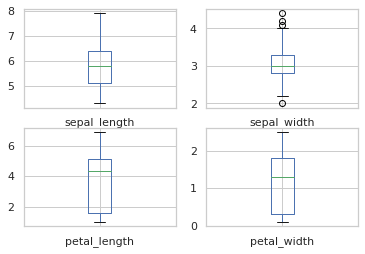

In [228]:
#box plot
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [229]:
#Scatter_matrix plot
fig = px.scatter_matrix(df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species")
fig.show()

In [208]:
#Split the data into train validation
array = df.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)


In [230]:
#Preparing the classifiers with their parameters
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [210]:
#Scores of each
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_validation, Y_validation)
    scores.append(score)

In [211]:
scores

[0.9,
 0.8333333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9666666666666667,
 0.9333333333333333,
 0.8333333333333334,
 0.9666666666666667,
 0.8]

In [225]:
#Analysis of the performance
df_score = pd.DataFrame()
df_score['name'] = names
df_score['score'] = scores
df_score

,name,score
0,Nearest_Neighbors,0.900000
1,Linear_SVM,0.833333
2,Polynomial_SVM,0.866667
3,RBF_SVM,0.866667
4,Gaussian_Process,0.866667
5,Gradient_Boosting,0.900000
6,Decision_Tree,0.900000
7,Extra_Trees,0.900000
8,Random_Forest,0.900000
9,Neural_Net,0.966667


In [226]:
cm = sns.light_palette("green", as_cmap=True)
s = df_score.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.900000
1,Linear_SVM,0.833333
2,Polynomial_SVM,0.866667
3,RBF_SVM,0.866667
4,Gaussian_Process,0.866667
5,Gradient_Boosting,0.900000
6,Decision_Tree,0.900000
7,Extra_Trees,0.900000
8,Random_Forest,0.900000
9,Neural_Net,0.966667


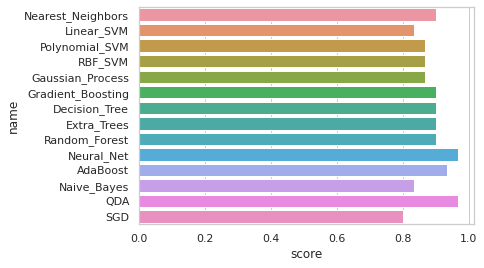

In [227]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df_score)